# 4장 넘파이 3편

## 주요 내용

- 어레이 활용: 부울 인덱싱, 전치 어레이, 정렬, 확률과 통계

## 기본 설정

`numpy` 모듈과 시각화 도구 모듈인 `matplotlib.pyplot`에 대한 기본 설정을 지정한다.

In [1]:
# 넘파이
import numpy as np
# 램덤 시드
np.random.seed(12345)
# 어레이 사용되는 부동소수점들의 정확도 지정
np.set_printoptions(precision=4, suppress=True)

# 파이플롯
import matplotlib.pyplot as plt
# 도표 크기 지정
plt.rc('figure', figsize=(10, 6))

아래 코드에서 정의하는 함수는 생성된 도표를 파일로 저장하는 함수이다.
강의 내용과 상관이 없다.
다만 이런 함수도 사용할 수 있다는 사실은 기억해두면 좋다.

In [2]:
import os

# 그래프 저장을 디렉토리 지정
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "graphs"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

# 그래프 저장 함수 선언
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=150):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("도표 저장하기:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 4.1 넘파이 다차원 어레이 객체(`ndarray`)

### 4.1.5 부울 인덱싱 (p. 150)

부울 인덱싱은 앞서 설명한 인덱싱/슬라이싱 기법이 처리하지 못하는
인덱싱/슬라이싱을 지원한다.

설명을 위해 아래 두 개의 어레이를 이용한다.

* 중복된 이름을 포함하는 1차원 어레이. 길이는 7.

In [3]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

* (7, 4) 모양의 2차원 어레이 무작위 생성
    - `randn()` 함수는 표준 정규 분포를 이용하여 임의의 부동소수점으로 이루어진 어레이 생성.

In [4]:
data = np.random.randn(7, 4)
data

array([[-0.2047,  0.4789, -0.5194, -0.5557],
       [ 1.9658,  1.3934,  0.0929,  0.2817],
       [ 0.769 ,  1.2464,  1.0072, -1.2962],
       [ 0.275 ,  0.2289,  1.3529,  0.8864],
       [-2.0016, -0.3718,  1.669 , -0.4386],
       [-0.5397,  0.477 ,  3.2489, -1.0212],
       [-0.5771,  0.1241,  0.3026,  0.5238]])

`names`에 포함된 이름이 Bob인지 여부를 확인하면 부울 값으로 이루어진 길이가 7인 어레이가 생성된다.
즉, 항목별 비교 연산이 이루어진다.

In [5]:
name_Bob = names == 'Bob'
name_Bob

array([ True, False, False,  True, False, False, False])

이제부터 `name_Bob` 어레이에서 
`True`가 위치한 인덱스를 이용하여 `data` 2차원 어레이를 대상으로 부울 인덱싱이 
작동하는 방법을 설명한다.

먼저, `data` 의 행의 길이가 7임에 주목하라.
이제 `name_Bob`에서 `True`가 위치한 인덱스에 해당하는 항목만 `data`에서 슬라이싱하려면
다음과 같이 부울 인덱싱을 사용한다.
결과는 `data`에서 0번행과 3번행만 가져온다.
이유는 `name_Bob`에서 0번, 3번 인덱스의 항목만 `True`이기 때문이다.

In [6]:
data[name_Bob]

array([[-0.2047,  0.4789, -0.5194, -0.5557],
       [ 0.275 ,  0.2289,  1.3529,  0.8864]])

부울 인덱싱과 일반 인덱싱, 슬라이싱을 혼합할 수 있다.

* 행 기준: Bob이 포함된 행의 인덱스를 갖는 행
* 열 기준: 2번 열 이후 전체

In [7]:
data[name_Bob, 2:]

array([[-0.5194, -0.5557],
       [ 1.3529,  0.8864]])

* 행 기준: Bob이 포함된 행의 인덱스를 갖는 행
* 열 기준: 3번 열

In [8]:
data[name_Bob, 3]

array([-0.5557,  0.8864])

#### 부울 인덱싱과 부울 연산

부울 연산자(`~`, `&`, `|`)를 부울 인덱싱에 직접 활용할 수 있다.
예를 들어, 이름이 Bob 아닌 이름이 위치한 인덱스에 해당하는 행만 가져오려면
`==` 대신에 `~=`를 이용하거나 `==`와 `~` 연산자를 함께 이용한다.

In [9]:
data[names != 'Bob']

array([[ 1.9658,  1.3934,  0.0929,  0.2817],
       [ 0.769 ,  1.2464,  1.0072, -1.2962],
       [-2.0016, -0.3718,  1.669 , -0.4386],
       [-0.5397,  0.477 ,  3.2489, -1.0212],
       [-0.5771,  0.1241,  0.3026,  0.5238]])

In [10]:
data[~name_Bob]

array([[ 1.9658,  1.3934,  0.0929,  0.2817],
       [ 0.769 ,  1.2464,  1.0072, -1.2962],
       [-2.0016, -0.3718,  1.669 , -0.4386],
       [-0.5397,  0.477 ,  3.2489, -1.0212],
       [-0.5771,  0.1241,  0.3026,  0.5238]])

다음은 Bob 또는 Will 이 위치한 인덱스에 해당하는 행만 가져온다.

In [11]:
mask = (names == 'Bob') | (names == 'Will')
mask

array([ True, False,  True,  True,  True, False, False])

In [12]:
data[mask]

array([[-0.2047,  0.4789, -0.5194, -0.5557],
       [ 0.769 ,  1.2464,  1.0072, -1.2962],
       [ 0.275 ,  0.2289,  1.3529,  0.8864],
       [-2.0016, -0.3718,  1.669 , -0.4386]])

__참고:__ 부울 인덱싱에 사용되는 부울 어레이를 __마스크__(mask)라고 부르기도 한다.
따라서 mask 변수가 종종 부울 인덱싱에 변수로 사용된다.

부울 인덱싱으로 동일한 모양의 부울 어레이를 사용할 수 있다.
부울 인덱싱으로 사용된 어레이의 항목이 참인 위치에 있는 항목만 가져온다. 
결과는 1차원 어레이다.

In [13]:
data[data < 0]

array([-0.2047, -0.5194, -0.5557, -1.2962, -2.0016, -0.3718, -0.4386,
       -0.5397, -1.0212, -0.5771])

즉, 음수인 항목의 개수는 15개라는 사실을 모양을 이용하여 확인할 수 있다.

In [14]:
data[data < 0].shape

(10,)

부울 인덱싱을 이용하여 특정 항목의 값을 변경할 수도 있다.
예를 들어, 아래 코드는 음수를 모두 0으로 변경한다.

In [15]:
mask = data < 0
data[mask] = 0
data

array([[0.    , 0.4789, 0.    , 0.    ],
       [1.9658, 1.3934, 0.0929, 0.2817],
       [0.769 , 1.2464, 1.0072, 0.    ],
       [0.275 , 0.2289, 1.3529, 0.8864],
       [0.    , 0.    , 1.669 , 0.    ],
       [0.    , 0.477 , 3.2489, 0.    ],
       [0.    , 0.1241, 0.3026, 0.5238]])

1차원 배열을 이용하여 부울 인덱싱을 사용하면 전체 행 또는 전체 열을 특정 값으로 변경할 수 있다.

* `names`에서 Joe가 사용되지 않은 항목의 인덱스에 해당하는 행에 포함된 항목을 모두 7로 변경하기

In [16]:
mask = names != 'Joe'
mask

array([ True, False,  True,  True,  True, False, False])

In [17]:
data[mask] = 7
data

array([[7.    , 7.    , 7.    , 7.    ],
       [1.9658, 1.3934, 0.0929, 0.2817],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [0.    , 0.477 , 3.2489, 0.    ],
       [0.    , 0.1241, 0.3026, 0.5238]])

__주의사항:__ 부울 인덱싱은 뷰를 이용하지 않고 새로운 어레이를 생성한다.

In [18]:
data2 = data[names == 'Bob']
data2

array([[7., 7., 7., 7.],
       [7., 7., 7., 7.]])

`data2`의 0번 행을 모두 -1로 변경해도 `data`는 변하지 않는다.

In [19]:
data2[0] = -1
data2

array([[-1., -1., -1., -1.],
       [ 7.,  7.,  7.,  7.]])

In [20]:
data

array([[7.    , 7.    , 7.    , 7.    ],
       [1.9658, 1.3934, 0.0929, 0.2817],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [0.    , 0.477 , 3.2489, 0.    ],
       [0.    , 0.1241, 0.3026, 0.5238]])

### 4.1.7 전치 어레이 (p. 155)

전치 행렬은 주어진 행렬의 행과 열을 서로 교환해서 얻어진다.

$$
\begin{bmatrix}
    1 & 2 \\
    3 & 4 \\
    5 & 6
\end{bmatrix}^{\,T}
=
\begin{bmatrix}
    1 & 3 & 5 \\
    2 & 4 & 6
\end{bmatrix}
$$

위 전치 행렬에 사용된 2차원 어레이는 아래처럼 생성할 수 있다.

__참고:__ 아래에서는 길이가 6인 1차원 어레이를 (3, 2) 모양의 2차원 어레이로 항목을 재배열하기 위해
`reshape()` 함수를 사용한다.

In [21]:
arr = np.arange(1, 7).reshape((3, 2))
arr

array([[1, 2],
       [3, 4],
       [5, 6]])

전치 어레이는 `T` 속성이 가리킨다.

In [22]:
arr.T

array([[1, 3, 5],
       [2, 4, 6]])

__주의사항:__ `T` 속성이 가리키는 전치 어레이는 뷰 방식을 사용한다.
따라서 전치 어레이를 변경하면 원래 어레이도 변경된다.

In [23]:
arr.T[1, 0] = -1

arr

array([[ 1, -1],
       [ 3,  4],
       [ 5,  6]])

전치 어레이는 머신러닝에서 가장 많이 사용되는 개념 중 하나이다.
대표적으로 행렬의 곱 또는 내적 등을 계산할 때 주로 활용되며,
예를 들어, 아래 코드는 `dot()` 함수를 이용한 행렬의 내적 연산을 보여준다. 

In [24]:
arr2 = np.random.randn(6, 3)
arr2

array([[ 0.0009,  1.3438, -0.7135],
       [-0.8312, -2.3702, -1.8608],
       [-0.8608,  0.5601, -1.2659],
       [ 0.1198, -1.0635,  0.3329],
       [-2.3594, -0.1995, -1.542 ],
       [-0.9707, -1.307 ,  0.2863]])

In [25]:
np.dot(arr2.T, arr2)

array([[ 7.9553,  3.1013,  6.0357],
       [ 3.1013, 10.6168,  2.3219],
       [ 6.0357,  2.3219,  8.1447]])

## 4.2 항목별 함수 적용 (p. 158)

어레이를 함수의 인자로 사용하면 해당 함수는 어레이 항목 각각에 대해 적용된다.

__참고:__ 이런 기능을 넘파이 내부에서 지원하는 함수가 `ufunc()`이며, __유니버설__ 함수라 부른다.

아래 1차원 어레이를 제곱근 함수와 지수 함수의 인자로 사용하면 각 항목의 제곱근과 지수값으로 이루어진
동일한 모양의 어레이가 생성된다.

In [26]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [27]:
np.sqrt(arr)

array([0.    , 1.    , 1.4142, 1.7321, 2.    , 2.2361, 2.4495, 2.6458,
       2.8284, 3.    ])

In [28]:
np.exp(arr)

array([   1.    ,    2.7183,    7.3891,   20.0855,   54.5982,  148.4132,
        403.4288, 1096.6332, 2980.958 , 8103.0839])

여러 개의 어레이를 인자로 받는 함수에 대해서도 동일한 방식으로 작동한다.
예를 들어, `maximum()` 함수는 항목별 최댓값으로 이루어진 어레이를 반환한다.

In [29]:
x = np.random.randn(8)
y = np.random.randn(8)

In [30]:
x

array([ 0.378 , -0.7539,  0.3313,  1.3497,  0.0699,  0.2467, -0.0119,
        1.0048])

In [31]:
y

array([ 1.3272, -0.9193, -1.5491,  0.0222,  0.7584, -0.6605,  0.8626,
       -0.01  ])

In [32]:
np.maximum(x, y)

array([ 1.3272, -0.7539,  0.3313,  1.3497,  0.7584,  0.2467,  0.8626,
        1.0048])

특정 함수는 여러 개의 어레이를 반환한다. 
예를 들어, `modf()` 함수는 부동소수점 어레이를 인자로 받으면
정수 부분과 소수 부분으로 구성된 동일한 모양(shape)의 두 개의 어레이(로 이루어진 튜플)를 반환한다.
따라서 정수들의 나눗셈 결과를 몫과 나머지로 보여주는 것과 동일한 효과를 낸다.

In [33]:
arr = (np.arange(8)/3).reshape((4,2))
arr

array([[0.    , 0.3333],
       [0.6667, 1.    ],
       [1.3333, 1.6667],
       [2.    , 2.3333]])

In [34]:
remainder, whole_part = np.modf(arr)

In [35]:
remainder

array([[0.    , 0.3333],
       [0.6667, 0.    ],
       [0.3333, 0.6667],
       [0.    , 0.3333]])

In [36]:
whole_part

array([[0., 0.],
       [0., 1.],
       [1., 1.],
       [2., 2.]])

이렇게 항목별 함수 적용을 지원하는 넘파이 함수는 모두 
`out` 키워드 인자를 사용하여 계산 결과를 지정된 변수에 저장할 수 있다.
단, 키워드 인자로 사용될 수 있는 변수는 
이미 동일한 모양의 어레이를 가리키는 변수로 선언되어 있어야 한다.

예를 들어, (4, 2) 모양의 2차원 어레이를 `arr2` 변수가 가리키도록 하자.

In [37]:
arr2 = (np.random.randn(8) * 5).reshape((4, 2))
arr2

array([[  0.25  ,   3.3511],
       [  4.2648,  -4.7793],
       [ -0.1175, -11.5212],
       [ -3.2623,  -6.0915]])

이제 `arr2`에 제곱근 함수를 적용한 결과를 `arr` 변수가 가기키도록 하려면 아래와 같이 한다.

__주의사항:__ 제곱근 함수는 음수에 대해서는 경고를 생성하며, 해당 항목은 `nan`으로 표시한다. 
nan은 not a number, 즉, 숫자가 아니다의 의미이다.

In [38]:
np.sqrt(arr2, out=arr)

<ipython-input-38-cefa55e4e7f0>:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(arr2, out=arr)


array([[0.5   , 1.8306],
       [2.0651,    nan],
       [   nan,    nan],
       [   nan,    nan]])

`arr` 변수가 위 결과를 가리키고 있음을 확인할 수 있다.

In [39]:
arr

array([[0.5   , 1.8306],
       [2.0651,    nan],
       [   nan,    nan],
       [   nan,    nan]])

`sqrt()` 함수처럼 어레이 인자를 받아서 항목별로 함수를 적용하는 함수가 60개 이상 존재하며,
그중 상당수가 수학 관련 함수이다. 
모든 함수들의 리스트는 넘파이의 
[유니버설 함수 공식문서](https://numpy.org/doc/stable/reference/ufuncs.html#available-ufuncs)를
참조하면 된다.

## 4.3 어레이 중심 프로그래밍 (p. 161)

연산과 함수 호출에 사용되는 넘파이 어레이는 기본적으로 항목 단위로 연산과 함수 호출이 이루어진다.
넘파이 어레이의 이런 특징을 잘 활용하도록 유도하는 프로그래밍을 
__어레이 중심 프로그래밍__(array-oriented programming)이라 한다. 

어레이를 중심으로 프로그래밍을 하면 예를 들어 많은 `for` 반복문을 생략할 수 있으며,
결과적으로 보다 효율적으로 코드를 구현할 수 있다.
또한 구현된 프로그램은 리스트를 이용하는 프로그램보다 빠르고 메모리 효율적으로 실행된다.
여기서는 몇 가지 예제를 이용하여 어레이 중심 프로그래밍을 소개한다. 

__예제:__ 2차원 격자(meshgrid) 어레이

아래 모양의 격자무뉘에 해당하는 2차원 어레이를 생성하라.
각 점의 좌표는 -1과 1사이의 값을 20개의 구간으로 균등하게 나눈 값들이다. 
즉, 가로 세로 모두 21개의 점으로 구성된다.

<img src="https://github.com/codingalzi/python-data-analysis/blob/master/notebooks/images/graphs/meshgrid20x20.png?raw=true" style="width:400px;">

먼저 `arange()` 함수를 이용하여 -1와 1 사이의 구간을 20개의 구간으로 균등하게 
나누는 어레이를 생성한다.

In [40]:
points = np.arange(-1, 1.1, 0.1) # 20개의 구간으로 균등하게 나눈다.
points

array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0. ,
        0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

`meshgrid()` 함수는 지정된 1차원 어레이 두 개를 이용하여 격자무늬의 좌표를 생성한다.
즉, 격자에 사용되는 점들의 x 좌표와 y 좌표를 따로따로 모아 두 개의 어레이를 반환한다.

In [41]:
xs, ys = np.meshgrid(points, points)

In [42]:
xs

array([[-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ],
       [-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ],
       [-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ],
       [-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ],
       [-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ],
       [-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ],
       [-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ],

In [43]:
ys

array([[-1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. ,
        -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. ],
       [-0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9,
        -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9],
       [-0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8,
        -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8],
       [-0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7,
        -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7],
       [-0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6,
        -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6],
       [-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5,
        -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5],
       [-0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4,
        -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4],

xs와 ys를 이용하여 산점도를 그리면 원하는 격자무늬가 얻어진다. 

도표 저장하기: meshgrid20x20


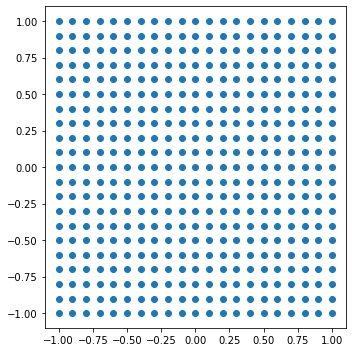

In [44]:
# 도표 크기 지정
plt.rc('figure', figsize=(5, 5))

# 산점도 그리기
plt.scatter(xs, ys)

# 그려진 산점도 저장
save_fig('meshgrid20x20')
plt.show()

__예제:__ 2차원 이미지 그리기

xs와 ys 각각의 제곱을 합하여 제곱근을 구하면 21x21 크기의 대칭 어레이가 얻어진다. 

In [45]:
z = np.sqrt(xs ** 2 + ys ** 2)

`z`를 흑백사진으로 표현하면 다음과 같다.
20x20 크기의 해상도를 가진 흑백사진의 명암 대비를 쉽게 알아볼 수 있는 사진이 생성된다.

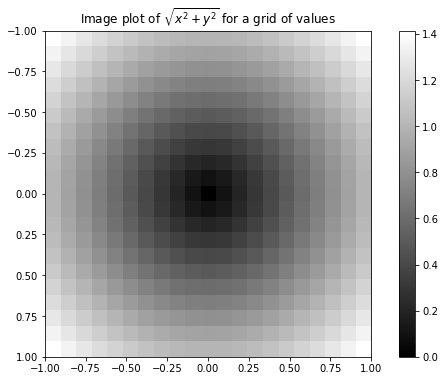

In [46]:
# 도표 크기 지정(기본값으로 되돌림)
plt.rc('figure', figsize=(10, 6))

# 흑백사진으로 보여주도록 함.
plt.imshow(z, cmap=plt.cm.gray, extent=[-1, 1, 1, -1])
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

plt.show()

__참고:__ 위 두 예제를 넘파이 어레이가 아니라 리스트와 `for` 반복문을 이용하여 구현하려고
시도하면 훨씬 많은 일을 해야 함을 어렵지 않게 알 수 있을 것이다.

### 4.3.1 어레이 삼항식 (p. 163)

부울 값으로 이루어진 어레이를 기준으로 `if` 조건식을 지정할 수 있다.
먼저, 아래 세 개의 어레이가 주어졌으며, 세 어레이의 모양이 모두 동일하다.

In [47]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

아래 리스트 조건제시법으로 생성되는 리스트와 동일한 어레이를 매우 간단하게 만들 수 있다.

In [48]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

어레이의 경우 `where()` 함수를 이용하여 어레이 삼항식을 사용하는 게 훨씬 간편하다.

In [49]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

__예제__

어레이 삼항식을 이용하여 기존 어레이의 항목이 양수면 2를, 음수면 -2를 사용하는 어레이를 생성해 보자.

먼저 무작위 수를 항목으로 사용하는 (4, 4) 모양의 어레이를 생성한다.

In [50]:
arr = np.random.randn(4, 4)
arr

array([[-1.3326,  1.0746,  0.7236,  0.69  ],
       [ 1.0015, -0.5031, -0.6223, -0.9212],
       [-0.7262,  0.2229,  0.0513, -1.1577],
       [ 0.8167,  0.4336,  1.0107,  1.8249]])

__주의:__ `zeros()`, `empty()` 함수 등과는 인자 형식이 (4, 4) 아니라
괄호를 생략한 4, 4 형식으로 인자를 지정한다. 

어레이 비교 연산을 이용하여 동일 모양의 부울 어레이를 생성하자.

In [51]:
arr > 0

array([[False,  True,  True,  True],
       [ True, False, False, False],
       [False,  True,  True, False],
       [ True,  True,  True,  True]])

`where()` 함수의 둘째, 셋째 인자는 어레이 대신에 특정 스칼라 자료형의 값을 사용할 수 있다.  
이 점을 이용하여 `arr` 어레이의 양수 항목에 해당하는 위치는 2, 
음수 항목에 해당하는 위치는 -2로 채운 어레이는 다음과 같이 생성한다.

In [52]:
np.where(arr > 0, 2, -2)

array([[-2,  2,  2,  2],
       [ 2, -2, -2, -2],
       [-2,  2,  2, -2],
       [ 2,  2,  2,  2]])

__예제__

아래 코드는 양수에 대해서만 2를, 나머지 경우는 기존의 항목을 그대로 사용하는 코드이다.

In [53]:
np.where(arr > 0, 2, arr)

array([[-1.3326,  2.    ,  2.    ,  2.    ],
       [ 2.    , -0.5031, -0.6223, -0.9212],
       [-0.7262,  2.    ,  2.    , -1.1577],
       [ 2.    ,  2.    ,  2.    ,  2.    ]])

### 4.3.2 수학/통계 용도 메서드 (p. 165)

In [54]:
arr = np.random.randn(5, 4)
arr
arr.mean()
np.mean(arr)
arr.sum()

2.2037341867973557

In [55]:
arr.mean(axis=1)
arr.sum(axis=0)

array([-0.2274,  3.039 , -2.1766,  1.5688])

In [56]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In [57]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr
arr.cumsum(axis=0)
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

### 4.3.3 부울 어레이 메서드: `all()`, `any()`

- 167쪽

In [58]:
arr = np.random.randn(100)
(arr > 0).sum() # Number of positive values

44

In [59]:
bools = np.array([False, False, True, False])
bools.any()
bools.all()

False

### 4.3.4 정렬

- 168쪽

In [60]:
arr = np.random.randn(6)
arr
arr.sort()
arr

array([-2.6444, -0.7519, -0.153 , -0.1326,  0.6095,  1.4573])

In [61]:
arr = np.random.randn(5, 3)
arr
arr.sort(1)
arr

array([[-0.4938, -0.1357,  1.24  ],
       [-0.8469,  0.6033,  1.43  ],
       [-0.4457, -0.2555,  1.2636],
       [-1.8245, -0.9616,  0.4684],
       [ 0.6254,  1.0229,  1.1074]])

In [62]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5% quantile

-1.551714991950571

### 4.3.5 집합 관련 함수

- 169

In [63]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

In [64]:
sorted(set(names))

['Bob', 'Joe', 'Will']

In [65]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])